<h1><center>Laboratory Work 9.</center></h1>
<h2><center>
    Predicting article views on Wiki using $prophet$ 
    <div>(Прогнозування переглядів статті на Wiki з використанням $prophet$)</div>
</center></h2>

<a class="anchor" id="9"></a>

## Outline

- [9.1. Data Preprocessing and Rolling Window Analysis](#lab-9.1)
- [9.2. Exponential Smoothing and Holt-Winters Models](#lab-9.2)
- [9.3. Stationarity, SARIMA, and Econometric Approaches](#lab-9.3)
- [9.4. Feature Engineering and Linear Models for Time Series](#lab-9.4)
- [9.5. Advanced Forecasting with Prophet](#lab-9.5)

In [1]:
import os
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

print(__version__)
init_notebook_mode(connected=True)

5.9.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

from prophet import Prophet

plt.rcParams["figure.figsize"] = (15, 10)

In [3]:
def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

## Data preparation

In [4]:
df = pd.read_csv("wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [5]:
df.shape

(383, 7)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [6]:
df.date = pd.to_datetime(df.date)

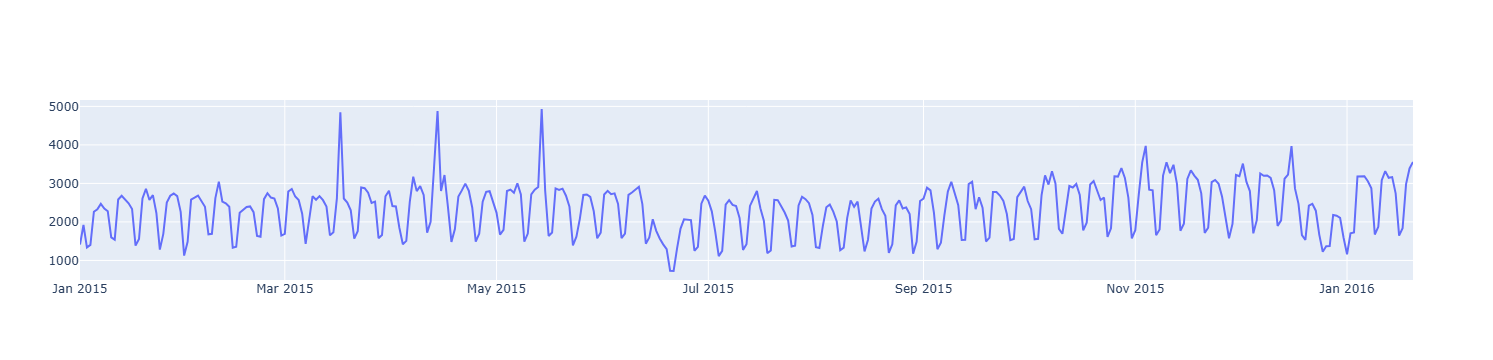

In [7]:
plotly_df(df.set_index("date")[["count"]])

Before working with [`prophet`](https://pypi.org/project/prophet/#history), install it via following command in your terminal:
```python
pip install fbprophet
```

In [8]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


<a class="anchor" id="lab-9.1"></a>

## <span style="color:blue; font-size:1.2em;">9.1. Data Preprocessing and Rolling Window Analysis</span>

[Back to the outline](#lab-9)

### <span style="color:red; font-size:1.5em;">Task 1</span>

---
**Variant 1:**  
Design a procedure to clean and prepare a weekly sales dataset collected over two years. Identify and remove outliers using an interquartile range approach, then apply a rolling mean with a window size of 4 weeks to smooth the data. Highlight any seasonal patterns that emerge from the smoothed time series.

*Technical note:*  
Use `pandas` for data handling (e.g., `read_csv`) and outlier removal, and apply `rolling(window=4).mean()` to compute the rolling mean. Leverage `matplotlib` or `seaborn` for visualization.  

---
**Variant 2:**  
Gather daily temperature readings from a public weather dataset over one year. Implement a rolling median with a 7-day window to reduce noise from unexpected temperature spikes. Then, compare how the rolling median and the rolling mean differ in preserving trends and seasonal variations in the dataset.

*Technical note:*  
Use `pandas` for reading the CSV file and for rolling operations (`rolling(window=7).median()`). Rely on `matplotlib` for plotting. Consider comparing results side by side with `rolling(window=7).mean()` to illustrate differences.  

---
**Variant 3:**  
Analyze a power consumption dataset with hourly granularity. Resample it to daily frequency, clean missing observations via linear interpolation, and apply a rolling standard deviation over a 3-day window. Investigate how the rolling standard deviation highlights sudden spikes in consumption.

*Technical note:*  
Use `pandas` (`resample('D')`) to aggregate hourly data into daily. Fill gaps with `interpolate(method='linear')`. Then perform rolling calculations (`rolling(window=3).std()`) to detect volatility.  

---
**Variant 4:**  
Take a dataset of website traffic (visitors per hour) and implement a rolling window correlation analysis between page views and bounce rate. Explore how correlation changes over a 24-hour rolling window, and interpret whether high page views correlate with higher or lower bounce rates in specific timeframes.

*Technical note:*  
Use `pandas.rolling(window=24).corr()`, ensuring the data frames align properly for correlation. Visualize the rolling correlation with `matplotlib.pyplot.plot` for temporal patterns.  

---
**Variant 5:**  
Investigate monthly rainfall data spanning a decade. Remove missing or corrupted entries and use a rolling window approach for cumulative rainfall over the last three months. Determine how this rolling cumulative total could support agricultural planning decisions (e.g., timing of planting or irrigation needs).

*Technical note:*  
Handle missing data via `dropna()`. For the rolling sum, use `rolling(window=3).sum()` in `pandas`. Optionally, employ `matplotlib` to create plots of cumulative rainfall to spot seasonal precipitation trends.  

---
**Variant 6:**  
Collect daily stock prices for a single company over multiple years. Convert the time series into weekly returns, then calculate a rolling average of these returns with a window of 8 weeks. Examine if any patterns in the smoothed returns can be linked to macroeconomic events or company-specific news.

*Technical note:*  
Use `pandas` (`resample('W')`) for weekly aggregation and create a returns column with `pct_change()`. A rolling mean is computed with `rolling(window=8).mean()`. Visualize results with libraries like `matplotlib` or `plotly` for an interactive view.  

---
**Variant 7:**  
Analyze a daily count of hospital admissions for respiratory illnesses across two consecutive years. Implement an exponential weighted moving average (EWMA) to place greater emphasis on recent trends. Compare EWMA with a simple rolling mean to see which method better reflects sudden spikes due to seasonal flu outbreaks.

*Technical note:*  
Use `pandas.DataFrame.ewm(span=7).mean()` for EWMA. Compare with `rolling(window=7).mean()`. Evaluate alignment with known flu seasons by plotting both lines over time.  

---
**Variant 8:**  
Consider a time series of hourly CO₂ emissions from a factory. Preprocess the dataset to fill missing hourly data using forward fill. Then, employ a rolling window of 12 hours to track short-term fluctuations in emissions. Discuss whether these fluctuations hint at operational inefficiencies or normal production cycles.

*Technical note:*  
Use `pandas` for forward filling (`ffill`) and `rolling(window=12).mean()` or `.std()`. Visualize with line plots to identify any repeating patterns.  

---
**Variant 9:**  
Work with a multi-year dataset of daily water levels in a reservoir. Remove weekend values and focus on weekdays only. Apply a rolling window approach with a 5-day span to understand short-term trends in water usage. Hypothesize how this rolling average might inform policy on water allocation during drought periods.

*Technical note:*  
Filter dates by weekday (`df[df['Date'].dt.weekday < 5]`), then use `rolling(window=5).mean()`. Visualize the results with line plots to illustrate policy considerations.  

---
**Variant 10:**  
Take a monthly inflation index over 15 years and apply a rolling median with a window of 3 months to reduce abrupt shifts from short-term economic events. Investigate whether the smoothed series provides a clearer understanding of underlying inflation trends for policymakers.

*Technical note:*  
Load data into a `pandas` DataFrame, and use `rolling(3).median()` to compute a short-term median. Plot the original and smoothed series in the same figure to compare.  

---
**Variant 11:**  
Analyze an e-commerce website’s weekly transaction amounts. Employ a rolling window with varying sizes (4, 8, and 12 weeks) to see how smoothing intervals affect detection of trends and anomalies. Compare which window size best captures seasonal effects like holiday spikes or promotional discounts.

*Technical note:*  
Leverage `pandas` for multiple rolling windows. Plot each smoothed series over time to illustrate differences in trend detection. Consider using color coding for clarity.  

---
**Variant 12:**  
Compile a dataset of daily passenger counts on a city bus route over six months. Implement a rolling minimum and maximum with a 7-day window to capture short-term peaks (e.g., local holidays or events) and troughs (e.g., weekends). Interpret how these rolling bounds relate to operational capacity planning.

*Technical note:*  
Use `rolling(window=7).min()` and `rolling(window=7).max()` in `pandas`. Plot with `matplotlib` to visualize daily passenger counts against rolling minima and maxima.  

---
**Variant 13:**  
Use a time series of daily energy consumption for a household over one year. Apply a rolling variance with a 14-day window to determine periods of significant fluctuation. Investigate whether these fluctuations coincide with household activities like vacations or the introduction of new appliances.

*Technical note:*  
After loading data via `pandas`, employ `rolling(14).var()`. Compare segments of high variance with known household events. Summaries can be visualized or tabulated for clarity.  

---
**Variant 14:**  
Investigate a daily dataset of solar panel output measured over one summer. Clean the data, addressing any missing days by inserting zeros. Then calculate a rolling sum over a 3-day window to track short-term cumulative energy production. Explain how this aids in analyzing performance drop due to potential panel issues or weather.

*Technical note:*  
Use `df.fillna(0)` to replace missing values. For cumulative energy, `rolling(3).sum()` is appropriate. Plot results using `matplotlib` for visual trends.  

---
**Variant 15:**  
Take temperature readings from multiple sensors in a greenhouse every 30 minutes. Convert them to hourly means, then compute a rolling window standard deviation with a 4-hour window to identify sensors that may be malfunctioning (e.g., showing abnormally high variance). Highlight suspicious sensors in a summary table.

*Technical note:*  
Use `resample('H').mean()` to get hourly readings, followed by `rolling(window=4).std()`. Compare standard deviations across sensors using group operations in `pandas`.  

---
**Variant 16:**  
Collect a daily count of public library check-outs over three years. Create rolling windows of two different sizes (7 days vs. 28 days) to examine immediate short-term patterns versus monthly seasonal shifts. Highlight any interesting divergences between short and longer rolling windows.

*Technical note:*  
Use `rolling(7).mean()` and `rolling(28).mean()` in `pandas`. Plot both on the same chart to show short-term fluctuations alongside monthly trends.  

---
**Variant 17:**  
Analyze a daily inbound call volume dataset for a call center. Remove outliers caused by system errors, and then apply a rolling median with a 5-day window. Determine whether the resulting series better captures typical call center traffic compared to raw data, especially around public holidays or scheduled outages.

*Technical note:*  
Outlier removal can use `df = df[df['calls'] < threshold]`. Rolling median is done via `rolling(5).median()`. Compare before/after with line graphs.  

---
**Variant 18:**  
Take a weekly sales dataset for a bakery chain over 18 months. Implement a rolling average with a window of 4 weeks, then overlay the original data in a plot to visually detect seasonal patterns (e.g., holiday surges). Discuss how a rolling average clarifies macro patterns in sales data.

*Technical note:*  
Use `pandas` for weekly data management and `rolling(4).mean()` for smoothing. `matplotlib.pyplot.plot` can overlay raw vs. smoothed data.  

---
**Variant 19:**  
Compile a daily precipitation series over multiple years. First, standardize the data (subtract mean, divide by std) so that different regions with varying rainfall amounts can be more easily compared. Next, apply a rolling mean with a 10-day window to see how standardized rainfall changes region by region.

*Technical note:*  
Perform standardization by `(df - df.mean()) / df.std()`. Then use `rolling(10).mean()`. Visualize separate lines for each region to compare standardized rainfall trends.  

---
**Variant 20:**  
Examine an hourly dataset of wind speeds collected by offshore turbines. Replace missing values with a short rolling median of 3 hours and then compute a rolling sum of wind gusts over 6 hours to capture sudden bursts. This approach can help wind farm operators manage turbine loads during windy intervals.

*Technical note:*  
Use `df.interpolate()` or `rolling(window=3).median()` for imputation. Then `rolling(window=6).sum()` for gust sums. Plot both raw and rolling-based data for clarity.

---

<a class="anchor" id="lab-9.2"></a>

## <span style="color:blue; font-size:1.2em;">9.2. Exponential Smoothing and Holt-Winters Models</span>

[Back to the outline](#lab-9)

### <span style="color:red; font-size:1.5em;">Task 2</span>

---
**Variant 1:**  
Obtain monthly tourist arrival data for a popular vacation spot. Apply simple exponential smoothing to highlight underlying growth trends. Compare how changing the smoothing parameter \(\alpha\) (e.g., 0.2 vs. 0.8) affects the responsiveness to sudden spikes, such as holiday seasons or special events.

*Technical note:*  
Use `statsmodels.tsa.holtwinters.SimpleExpSmoothing`. Adjust \(\alpha\) to find an optimal balance between smoothing and responsiveness. Plot both predictions to compare.  

---
**Variant 2:**  
Analyze weekly coffee shop revenue across one year. Implement Holt-Winters additive model to forecast monthly revenue and incorporate seasonality. Evaluate the ability of the model to capture peaks during winter holidays versus a simple exponential smoothing that ignores seasonality.

*Technical note:*  
Use `statsmodels.tsa.holtwinters.ExponentialSmoothing` with `trend='add'` and `seasonal='add'` or `'mul'`, specifying the season_length. Compare AIC or MSE between the Holt-Winters approach and simpler methods.  

---
**Variant 3:**  
Use a time series of monthly grocery store sales that show both trend and strong seasonal patterns. Explore the multiplicative Holt-Winters model and visualize the decomposed components (level, trend, and seasonal). Discuss how effectively the model handles seasonal amplitudes that grow over time.

*Technical note:*  
Employ `ExponentialSmoothing(data, trend='add', seasonal='mul', seasonal_periods=12)` from `statsmodels`. Use `.fit()` to retrieve fitted values and components.  

---
**Variant 4:**  
Examine a dataset of daily electricity usage from a smart meter. First, aggregate it to weekly usage. Next, apply a Holt’s linear trend model to forecast usage for the next two months. Assess how well the model handles an upward or downward consumption trend relative to naive forecasts.

*Technical note:*  
Use `ExponentialSmoothing(weekly_data, trend='add', seasonal=None)`. Evaluate forecast accuracy via MSE or MAE with `sklearn.metrics`. Visualization can be done with `matplotlib`.  

---
**Variant 5:**  
Explore daily retail transactions that spike on weekends. Use a two-parameter exponential smoothing approach (Holt’s method) to capture the trend component, then attempt to incorporate a day-of-week factor. Compare the result with a purely trend-based approach to see if ignoring daily seasonality leads to systematic forecast errors.

*Technical note:*  
`Holt` is found in `statsmodels.tsa.holtwinters`. For daily seasonality, consider decomposing day-of-week effects or using `ExponentialSmoothing` with `seasonal_periods=7`.  

---
**Variant 6:**  
Take daily bike-sharing usage data for a city. Apply a Holt-Winters model with additive seasonality, considering a 7-day cycle. Investigate if the model captures higher usage on weekends and lower usage on weekdays, and explain how adjusting the seasonal period can fine-tune short-term forecasts.

*Technical note:*  
Set `seasonal_periods=7` for the weekly cycle. Use `trend='add'` and `seasonal='add'`. Evaluate forecasts with MAPE or RMSE to gauge accuracy.  

---
**Variant 7:**  
Study monthly airline passenger data over several years. Compare three approaches: simple exponential smoothing, Holt’s method, and Holt-Winters with multiplicative seasonality. Determine which approach yields the best forecast for the next year, focusing on the cyclical growth typical of airline travel.

*Technical note:*  
Implement `SimpleExpSmoothing`, `Holt`, and `ExponentialSmoothing` from `statsmodels`, each with different parameters. Compare forecast metrics like MAPE or AIC.  

---
**Variant 8:**  
Use daily hotel occupancy rates from an online platform. Implement exponential smoothing to filter out random fluctuations. Then explore how varying the damping parameter in Holt’s damped trend model influences the long-term occupancy forecast, preventing overly aggressive predictions of continuous growth.

*Technical note:*  
Set `damped_trend=True` in `ExponentialSmoothing`. Tune the damping parameter to temper the slope. Compare forecast lines for different damping factors.  

---
**Variant 9:**  
Gather a weekly dataset of subscription renewals for a streaming service. The data show a gradual upward trend plus seasonal peaks during holiday promotions. Implement Holt-Winters with additive trend and seasonal components. Examine if the model adequately forecasts subscription surges in December and summer months.

*Technical note:*  
Use `ExponentialSmoothing(weekly_data, trend='add', seasonal='add', seasonal_periods=52)` approximating weekly seasonality over a year. Evaluate the model with SSE or MSE.  

---
**Variant 10:**  
Analyze daily foot traffic to a museum. The data reveals a complex pattern with higher visits on weekends and holidays. Break the data into training (first three months) and testing sets (last month). Fit a Holt-Winters model with day-of-week seasonality, then measure how accurately it predicts foot traffic in the test period.

*Technical note:*  
Split the dataset and use `ExponentialSmoothing(..., seasonal_periods=7)`. Evaluate the test set predictions using MAE or RMSE from `sklearn`.  

---
**Variant 11:**  
Investigate temperature readings recorded thrice daily over three months. Use exponential smoothing to reduce noise, and discuss how altering the smoothing parameter influences real-time analytics. If \(\alpha\) is too large, the model may overreact to daily fluctuations; if \(\alpha\) is too small, the model may lag behind changing conditions.

*Technical note:*  
Use `SimpleExpSmoothing` from `statsmodels.tsa.holtwinters`, adjusting `smoothing_level`. Compare the smoothed curves visually to illustrate the effect of \(\alpha\).  

---
**Variant 12:**  
Consider monthly stock price indices over five years. Apply Holt’s linear trend model, then add a damping parameter to capture a decelerating trend. Discuss which scenario is more realistic for stock indices that experience reversion to the mean, using historical data to illustrate if the damped trend improves forecasts.

*Technical note:*  
Implement `ExponentialSmoothing(..., trend='add', damped_trend=True)`. Evaluate performance with out-of-sample forecasts. Use `matplotlib` to overlay actual vs. forecast.  

---
**Variant 13:**  
Work with a weekly cryptocurrency trading volume dataset. Fit a Holt-Winters model with a multiplicative trend, suspecting exponential growth. Check if the multiplicative component leads to overly volatile forecasts, and compare that to an additive model to see which aligns better with historical data.

*Technical note:*  
`ExponentialSmoothing(data, trend='mul', seasonal='add' or 'mul', seasonal_periods=??).fit()`. Evaluate on a hold-out sample to measure MAPE.  

---
**Variant 14:**  
Use a daily dataset of online support tickets for a software product. Apply a simple exponential smoothing model and forecast the number of incoming tickets for the next two weeks. Investigate how well the model picks up on cyclical spikes that typically occur after major product launches or updates.

*Technical note:*  
`SimpleExpSmoothing(data).fit()` can generate short-term forecasts. Evaluate performance with MSE or RMSE. Plot forecast intervals if desired.  

---
**Variant 15:**  
Analyze the demand for a seasonal product (e.g., winter clothing) using weekly sales data over 3 years. Employ the Holt-Winters method with an additive trend and a seasonal period of 52. Note how the model adjusts to recurring winter peaks and lower off-season sales, and measure forecast accuracy during peak months.

*Technical note:*  
Use `ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=52)`. Compare predicted vs. actual in the winter season using MAPE or MAE.  

---
**Variant 16:**  
Investigate a daily dataset of mobile game in-app purchases over six months. Explore Holt’s method with a damped trend to forecast next month’s revenue. Evaluate if the damped trend forecast aligns more closely with reality, especially when user engagement plateaus after initial growth periods.

*Technical note:*  
Enable `damped_trend=True` and find an optimal damping factor through parameter tuning. Compare forecasts using validation data.  

---
**Variant 17:**  
Gather monthly phone plan subscription data. Fit a Holt-Winters model that accounts for a strong seasonal effect every January. Show how an additive seasonal model can incorporate holiday promotions or new-year campaigns. Stress-test the model by adjusting seasonal_periods if the product’s cycle deviates from a strict 12-month pattern.

*Technical note:*  
`ExponentialSmoothing(subscription_data, trend='add', seasonal='add', seasonal_periods=12)` is typical. Evaluate using out-of-sample forecasts for the next few months.  

---
**Variant 18:**  
Utilize daily fitness app user logs over 12 weeks, which display weekday vs. weekend usage differences. Experiment with both additive and multiplicative seasonality in a Holt-Winters model to see which best represents usage extremes on Saturdays and Sundays. Evaluate results using a time-series split for cross-validation.

*Technical note:*  
Select `trend='add'` with either `seasonal='add'` or `seasonal='mul'`, specifying a 7-day period. Use `TimeSeriesSplit` from `sklearn.model_selection` to systematically compare.  

---
**Variant 19:**  
Take daily shipments data from a logistics company for six months, noticing large spikes at month-end. Implement a Holt-Winters model with additive seasonality. Compare the fitted seasonal component to actual shipping spikes to gauge whether the model’s seasonality assumption is appropriate or if further tuning is required.

*Technical note:*  
Initialize `ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=30)` or approximate monthly cycles. Inspect the seasonal array with the model’s fitted params.  

---
**Variant 20:**  
Explore the daily number of downloads for a new mobile app over three months. Estimate short-term forecasts with exponential smoothing. Evaluate how well the forecast adapts to promotional events that occasionally boost downloads. Comment on whether combining exponential smoothing with external indicators (e.g., marketing spend) could improve accuracy.

*Technical note:*  
Leverage `SimpleExpSmoothing(downloads).fit()`. For external regressors, consider advanced models such as SARIMAX with exogenous variables in `statsmodels`. Compare forecast errors over the promotional periods.

---

<a class="anchor" id="lab-9.3"></a>

## <span style="color:blue; font-size:1.2em;">9.3. Stationarity, SARIMA, and Econometric Approaches</span>

[Back to the outline](#lab-9)

### <span style="color:red; font-size:1.5em;">Task 3</span>

---
**Variant 1:**  
Obtain a monthly retail sales dataset that shows a clear upward trend. Perform an Augmented Dickey-Fuller (ADF) test to check for stationarity. If the test suggests non-stationarity, apply first-order differencing. Discuss how differencing impacts the dataset’s trend and how it might improve the reliability of ARIMA modeling.

*Technical note:*  
Use `statsmodels.tsa.stattools.adfuller` for the ADF test. If \(p > 0.05\), apply `.diff()` in `pandas`. Plot data before and after differencing.  

---
**Variant 2:**  
Analyze daily electricity demand data with both trend and seasonality. Conduct the ADF test to verify stationarity. Apply seasonal differencing (e.g., differencing by 7 days for weekly seasonality) if needed. Explore whether further transformations (log transform) help in stabilizing variance before SARIMA fitting.

*Technical note:*  
Use `adfuller` to test stationarity. For seasonal differencing, `df.diff(7)`. Optionally apply `np.log1p(df)` to reduce variance. Evaluate stationarity again.  

---
**Variant 3:**  
Collect monthly airline passenger data and fit a SARIMA model to capture seasonality. Determine the optimal (p, d, q) x (P, D, Q, m) parameters using AIC or BIC. Discuss the significance of seasonal orders in capturing cyclical travel behavior. Compare forecasts to actual data over a designated test period.

*Technical note:*  
Use `pmdarima.arima.auto_arima` or `statsmodels.tsa.statespace.SARIMAX` with hyperparameter grid search. Evaluate the best model with metrics like AIC, BIC, or MAPE.  

---
**Variant 4:**  
Investigate a quarterly GDP dataset spanning 20 years. First, test for stationarity. If the series is non-stationary, experiment with removing trend via differencing or polynomial detrending. Fit an ARIMA or SARIMA model and compare forecast accuracy in capturing economic cycles.

*Technical note:*  
Use `np.polyfit` or differencing in `pandas`. Implement `SARIMAX(endog, order=(p,d,q), seasonal_order=(P,D,Q,m))`. Compare MSE or RMSE for different models.  

---
**Variant 5:**  
Work with a daily dataset of online transactions that display weekly seasonality. Use the ADF test to assess stationarity. If needed, apply a seasonal ARIMA approach with weekly seasonality (m=7). Show how ignoring the weekly pattern leads to inferior forecasts compared to a properly fitted SARIMA model.

*Technical note:*  
`statsmodels.tsa.statespace.SARIMAX(endog, order=(p,d,q), seasonal_order=(P,D,Q,7))`. Confirm the final model with the lowest AIC/BIC and validate forecast accuracy on a hold-out set.  

---
**Variant 6:**  
Analyze daily rainfall data that is often zero. Log or Box-Cox transformations might be unhelpful due to zero values. Instead, difference the series or use seasonal decomposition to achieve stationarity. Fit an ARIMA model if stationarity is met, and discuss how zero-inflated data challenges typical modeling assumptions.

*Technical note:*  
Use `df.diff()` to difference or `statsmodels.tsa.seasonal.seasonal_decompose`. For ARIMA, rely on `statsmodels.tsa.arima.model.ARIMA`. Consider advanced zero-inflation methods if zeros dominate.  

---
**Variant 7:**  
Take monthly consumer price index (CPI) data. Perform the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test alongside the ADF test to solidify stationarity conclusions. If needed, difference the series. Implement a SARIMA model, picking seasonal parameters to match known annual cycles in prices.

*Technical note:*  
Use `statsmodels.tsa.stattools.kpss` for KPSS. For ARIMA, try `SARIMAX(endog, order, seasonal_order)`. Evaluate model fit with AIC or likelihood ratio tests.  

---
**Variant 8:**  
Examine weekly sales of a supermarket chain’s fresh produce. These sales typically peak on weekends. Check stationarity, then implement a SARIMA model with a seasonal period of 7. Illustrate how ignoring day-of-week effects can result in underestimation of weekend demand and overestimation on weekdays.

*Technical note:*  
Set `seasonal_order=(P,D,Q,7)` in `SARIMAX`. Evaluate forecasts using mean absolute error across day-of-week segments.  

---
**Variant 9:**  
Study daily internet traffic logs for a news website that experiences occasional viral spikes. Test for stationarity using the ADF test. If non-stationary, difference the series or apply a log transform. Fit a SARIMA model and compare its forecast of normal traffic levels vs. actual data during viral event windows.

*Technical note:*  
`adfuller` for stationarity checks, use `np.log(traffic + 1)` or differencing. Fit with `SARIMAX`. Assess forecast errors specifically around spike periods.  

---
**Variant 10:**  
Gather a monthly dataset of industrial production indexes. Split into training (first 8 years) and test (last 2 years). Fit an ARIMA model on the training set, adjusting differencing parameters for stationarity. Evaluate predictions on the test set using MAPE, focusing on stable vs. volatile periods.

*Technical note:*  
`ARIMA(order=(p,d,q))` in `statsmodels.tsa.arima.model`. Use `train_test_split` logic or manual slicing of time series. Evaluate with `mean_absolute_percentage_error` in `sklearn`.  

---
**Variant 11:**  
Research a daily dataset of a restaurant’s total orders that exhibits trend and weekly seasonality. Implement an SARIMA approach or an ARIMA approach with external dummy variables for weekdays vs. weekends. Compare which method better explains the cyclical fluctuations. Verify stationarity prior to modeling.

*Technical note:*  
For SARIMA, `(p,d,q) x (P,D,Q,7)`. Alternatively, use `ARIMA` with exogenous features (dummies for day-of-week). Evaluate with a validation set.  

---
**Variant 12:**  
Analyze a monthly dataset of housing starts (new houses built). Check stationarity using both ADF and KPSS. If needed, difference the series or remove seasonal components. Compare a purely ARIMA model vs. a SARIMA model with a 12-month cycle to see which approach best forecasts new housing starts.

*Technical note:*  
Use `statsmodels.tsa.stattools.adfuller` and `kpss`. For seasonal data, `seasonal_order=(P,D,Q,12)`. Evaluate MSE or AIC.  

---
**Variant 13:**  
Work with weekly oil production data over several years. Identify whether seasonal variations occur around certain months or times of year. If such patterns exist, a seasonal differencing approach and a SARIMA model might work. If not, a standard ARIMA might suffice. Justify the final modeling choice.

*Technical note:*  
Plot the time series to detect seasonality. Use `SARIMAX` if seasonality is present, specifying relevant period. Evaluate multiple candidate models with AIC or BIC.  

---
**Variant 14:**  
Study daily wind turbine energy outputs. Conduct an ADF test to check for stationarity. If the series is borderline stationary, compare partial autocorrelation plots with and without differencing. Fit an ARIMA model based on the partial autocorrelation function (PACF), and interpret PACF peaks as potential lags.

*Technical note:*  
Use `adfuller` from `statsmodels`, then `plot_pacf` from `statsmodels.graphics.tsaplots`. Fit an ARIMA where p is guided by significant PACF lags.  

---
**Variant 15:**  
Collect a monthly dataset of job vacancies with strong year-end spikes. Evaluate the presence of unit roots through the ADF test. Deploy a SARIMA model with seasonal periods of 12 to capture year-end spikes. Investigate whether second-order seasonal differencing is necessary for stable residuals.

*Technical note:*  
Check stationarity via `adfuller`. Then use `(P,D,Q,12)` with D possibly as 1 or 2. Evaluate residual plots and diagnostic tests like `acf` of residuals.  

---
**Variant 16:**  
Use a quarterly financial index time series spanning a decade. Test for stationarity, and if differencing is needed, determine the minimal differencing order (d=1 vs. d=2). Fit an ARIMA model with the discovered differencing and confirm if the residuals exhibit white noise through Ljung-Box tests.

*Technical note:*  
Use `df.diff(1)`, `df.diff(2)`, or no differencing, depending on stationarity tests. `statsmodels.tsa.stattools.acf` or `statsmodels.stats.diagnostic.acorr_ljungbox` for residual checks.  

---
**Variant 17:**  
Examine daily web page hits that climb due to trending news articles. If the series is non-stationary, apply differencing. Then, consider a seasonal ARIMA if the hits repeat in cycles (e.g., weekends or certain weekdays). Justify your model selection using AIC or RMSE on a hold-out set.

*Technical note:*  
Check stationarity with `adfuller`, difference as needed. `SARIMAX(order, seasonal_order=(P,D,Q,7))` if day-of-week patterns are present. Evaluate final metrics on test set.  

---
**Variant 18:**  
Compile daily atmospheric pressure measurements from a weather station. Perform the ADF test and find that the series is non-stationary due to trend. Difference the data once, re-check stationarity, and fit an ARIMA model. Compare the forecast to a naive method (last observation carried forward) to highlight improvements.

*Technical note:*  
Use `df.diff()` for differencing. Re-run `adfuller` until stationary. Fit ARIMA via `statsmodels.tsa.arima.model.ARIMA`. Evaluate MAPE or MAE on test data.  

---
**Variant 19:**  
Collect monthly power usage from multiple factories. Some factories exhibit strong seasonality while others do not. Demonstrate how to separate data by factory, check stationarity individually, and apply ARIMA or SARIMA as appropriate. Summarize how a blanket approach can fail when stationarity assumptions differ across facilities.

*Technical note:*  
Split data by factory, run ADF for each subset, differencing or seasonal differencing as needed. Use `statsmodels.tsa.statespace.SARIMAX` for final fits.  

---
**Variant 20:**  
Gather weekly shipping volumes for an e-commerce business, noticing surges near special shopping events. Incorporate these events as dummy regressors in a SARIMAX model to see if it improves forecast accuracy beyond a pure SARIMA. Discuss how including exogenous variables can help when the data is not strictly stationary due to external factors.

*Technical note:*  
In `statsmodels.tsa.statespace.SARIMAX`, pass exogenous variables (e.g., promotion dummies). Evaluate forecast error during special events vs. normal weeks.

---

## <span style="color:blue; font-size:1.2em;">Section 4. </span>



<a class="anchor" id="lab-9.4"></a>

## <span style="color:blue; font-size:1.2em;">9.4. Feature Engineering and Linear Models for Time Series</span>

[Back to the outline](#lab-9)

### <span style="color:red; font-size:1.5em;">Task 4</span>

---
**Variant 1:**  
Use hourly traffic data on a major highway. Create time-based features: hour of day, day of week, and is_holiday. Then, train a linear regression model that predicts traffic volume. Compare the model’s performance with and without these features to illustrate how time-based feature engineering affects forecast accuracy.

*Technical note:*  
Create features using `df['hour'] = df.index.hour`, etc. Fit a linear regression via `sklearn.linear_model.LinearRegression`. Evaluate using MAE or R^2 on a validation set.  

---
**Variant 2:**  
Analyze a daily dataset of stock closing prices. Generate lag features (t-1, t-2, t-3) and rolling averages (7-day, 14-day) as predictive inputs. Fit a regularized regression (Lasso) to predict the next day’s closing price. Observe if certain lags or rolling averages hold strong predictive value.

*Technical note:*  
Construct lag features using `df['lag1'] = df['Close'].shift(1)`, etc. Rolling features via `df['roll7'] = df['Close'].rolling(7).mean()`. Fit `Lasso` with cross-validation.  

---
**Variant 3:**  
Collect monthly consumption data for different utility customers. Engineer seasonal dummy variables for each month to capture cyclical usage. Fit a linear regression model to forecast monthly consumption. Investigate whether certain months significantly impact consumption patterns, as revealed by the regression coefficients.

*Technical note:*  
Convert month to categorical dummies using `pd.get_dummies(df.index.month)`. Fit the model with `LinearRegression()`. Inspect coefficient magnitudes for interpretability.  

---
**Variant 4:**  
Work with daily air quality data. Create polynomial features of lagged PM2.5 readings (e.g., PM2.5_t-1, (PM2.5_t-1)^2) to capture non-linear relationships. Fit a Ridge regression model to predict the current day’s PM2.5 level. Evaluate if polynomial expansions of lagged features improve RMSE over simpler linear models.

*Technical note:*  
Use `sklearn.preprocessing.PolynomialFeatures` on lagged columns, then `Ridge` from `sklearn.linear_model`. Perform a train-test split or time series cross-validation.  

---
**Variant 5:**  
Analyze daily sales of an online retailer. Construct time-to-holiday features (days until next holiday) and lagged sales features. Fit a regression model and evaluate if proximity to a major holiday is a strong predictor. Compare feature importance scores if using a tree-based model like Random Forest.

*Technical note:*  
Manually compute days to holiday or keep a reference date table. Use `df.shift()` for lag features. Evaluate importance with `RandomForestRegressor.feature_importances_` or a standard regression metric.  

---
**Variant 6:**  
Build a dataset from hourly temperature measurements. Introduce a cyclical encoding for hours of the day (using sine and cosine transforms) to respect the circular nature of time. Feed these features into a linear regression to forecast next hour’s temperature. Assess if cyclical encoding outperforms naive numeric encoding.

*Technical note:*  
Compute `df['hour_sin'] = np.sin(2 * π * hour / 24)`, `df['hour_cos'] = np.cos(2 * π * hour / 24)`. Fit using `LinearRegression()`. Compare MSE with normal hour encoding.  

---
**Variant 7:**  
Utilize a weekly dataset of retail chain revenue. Extract trend features (e.g., an integer index for each week) and cyclical features (month of year). Fit a linear model that includes interactions between trend and seasonal dummies. Investigate whether the interplay between long-term growth and seasonal effects emerges in the model coefficients.

*Technical note:*  
Create interaction terms via `pandas` or `sklearn.preprocessing.PolynomialFeatures(include_bias=False, interaction_only=True)`. Evaluate with MAPE or RMSE.  

---
**Variant 8:**  
Collect daily traffic accidents data for a region. Create lag features for accidents on the previous 1, 7, and 14 days. Augment these with day-of-week dummy variables. Train a linear regression model to predict accidents for the next day. Discuss how day-of-week and recent lags help capture cyclical accident patterns.

*Technical note:*  
`df['lag1'] = df['accidents'].shift(1)`, similarly for 7 and 14. Dummies for day-of-week from `df.index.weekday`. Fit model in `sklearn`.  

---
**Variant 9:**  
Work with a monthly greenhouse gas emissions dataset. Construct features for average monthly temperature and monthly industrial output as additional regressors. Fit a linear model to see if changes in temperature or industrial activity correlate strongly with emissions. Compare results to a univariate time series model.

*Technical note:*  
Merge multiple data sources into one DataFrame. Fit a multiple linear regression. Evaluate R^2 or MAE to measure improvements from exogenous features.  

---
**Variant 10:**  
Analyze daily website visits for a media site. Generate click-through rate (CTR) and marketing spend as external features. Include lags of these features (e.g., CTR_t-1, spend_t-1). Fit an elastic net regression to forecast daily visits. Check if marketing spend changes exhibit delayed or immediate effects on visits.

*Technical note:*  
Use `df['CTR_lag1'] = df['CTR'].shift(1)` and so on. Fit `ElasticNet` from `sklearn.linear_model`. Evaluate with a time series train-test split to avoid leakage.  

---
**Variant 11:**  
Study an hourly load on a cloud computing service. Create time-lagged features for load and a binary feature for business vs. non-business hours. Fit a linear regression to forecast the next hour’s load, focusing on whether the business-hour indicator significantly shifts the predicted usage patterns.

*Technical note:*  
Construct `df['is_business_hour'] = (df.index.hour >= 9) & (df.index.hour < 17)`. Also, `df['lag1'] = df['load'].shift(1)`. Use `LinearRegression()` or `Ridge`.  

---
**Variant 12:**  
Obtain daily water consumption data and produce features for day-of-week, day-of-month, and public holiday. Also, create a rolling average over the past 7 days as an input. Evaluate a linear model’s predictions, emphasizing how these features capture both short-term memory (rolling average) and calendar effects.

*Technical note:*  
Use `df.index.dayofweek`, `df.index.day`, and a holiday lookup table. `df['roll7'] = df['consumption'].rolling(7).mean()`. Split data for out-of-sample testing.  

---
**Variant 13:**  
Compile a weekly dataset of mobile app active users. Engineer growth rate features by comparing this week to last week’s user count. Build a linear model that predicts next week’s user count. Investigate if including the growth rate (and its lags) reduces forecast errors compared to a model without it.

*Technical note:*  
Growth rate: `df['growth_rate'] = df['users'].pct_change()`. Possibly add lagged growth rates. Fit `LinearRegression` or `Lasso`. Evaluate MAPE.  

---
**Variant 14:**  
Use daily store visit data for a retail chain. Include weather variables (temperature, precipitation) as external features. Generate squared terms for precipitation to capture non-linear effects (very high precipitation possibly deters visits more severely). Assess if these non-linear weather features enhance forecast accuracy.

*Technical note:*  
Merge weather info with store visits. `df['rain_squared'] = df['rain']**2`. Compare linear vs. polynomial feature sets with cross-validation.  

---
**Variant 15:**  
Examine an hourly call center volume dataset. Engineer a feature set with time-of-day, day-of-week, and lags of call volume. Further add an interaction between day-of-week and time-of-day to capture rush hour vs. weekend differences. Fit a linear model, then evaluate if these interaction terms significantly improve forecasts.

*Technical note:*  
Create interactions via `pandas` or `sklearn` transforms. Assess improvements in MSE or MAE compared to a simpler model.  

---
**Variant 16:**  
Analyze daily ride-hailing demand data. Generate a set of lag features (1, 7, 14, 21) plus cyclical day-of-week encoding. Fit a robust linear model (e.g., HuberRegressor) to handle potential outliers from sudden demand surges. Inspect if these outliers remain once the model includes relevant cyclical factors.

*Technical note:*  
`sklearn.linear_model.HuberRegressor()` can reduce outlier influence. Combine lag features and cyclical encoding for day-of-week using `sin/cos` transformations.  

---
**Variant 17:**  
Collect a monthly car sales dataset. Build polynomial expansions of the time index (e.g., t, t^2) to model non-linear growth. Compare this polynomial trend approach in linear regression against a simpler linear time trend. Evaluate how well each method explains cyclical peaks in car sales.

*Technical note:*  
Use `PolynomialFeatures(degree=2)` or `degree=3`. Fit regression with cross-validation, measure R^2 or MSE.  

---
**Variant 18:**  
Work with a quarterly revenue series for a software subscription business. Generate features that combine the quarter number (1 to 4) with a linear time trend. Fit a linear model to see if Q1, Q2, Q3, or Q4 interacts with the long-term trend differently. Summarize findings on which quarter’s slope is highest.

*Technical note:*  
Create `quarter_dummies` from `df.index.quarter`. Multiply each dummy by time index to get interaction. Fit `LinearRegression`, interpret coefficients.  

---
**Variant 19:**  
Analyze daily ad impressions for a digital marketing campaign. Develop features capturing day-of-week, cumulative budget spent so far, and an exponential decay factor to represent ad fatigue. Fit a linear model to forecast daily impressions. Check if the decay factor is a strong predictor of diminishing returns.

*Technical note:*  
Use a column like `df['ad_fatigue'] = np.exp(-0.01*df['days_since_start'])`. Evaluate improvements over a baseline model.  

---
**Variant 20:**  
Consider an hourly wind farm power output dataset. Generate features for wind speed and direction from a meteorological feed. Create lagged wind speed features and a categorical variable for wind direction range. Assess which combination of these features in a linear model best anticipates next hour’s power output.

*Technical note:*  
Merge meteorological data; bucket wind direction into intervals (e.g., N, NE, E, SE...). Construct lags of wind speed. Fit `LinearRegression` or `Ridge` to see effect on R^2.  

---

<a class="anchor" id="lab-9.5"></a>

## <span style="color:blue; font-size:1.2em;">9.5. Advanced Forecasting with Prophet</span>

[Back to the outline](#lab-9)

### <span style="color:red; font-size:1.5em;">Task 5</span>

---
**Variant 1:**  
Load a daily dataset of e-commerce sales for a fashion brand. Use Prophet to forecast sales for the next month. Include a custom holiday file for major fashion sale events and examine if adding these events as regressors improves the forecast. Compare results with a Prophet model that ignores holiday effects.

*Technical note:*  
`prophet.Prophet(holidays=holidays_df)` can incorporate holiday data. Evaluate forecast accuracy with MAPE or MAE. Prophet version 1.1.6 supports custom seasonalities and holiday parameters.  

---
**Variant 2:**  
Analyze a daily dataset of web traffic for a news site. Fit a Prophet model with both weekly and yearly seasonality enabled. Investigate whether specifying a higher Fourier order for yearly seasonality captures cyclical trends better than default settings. Compare the predictions in a hold-out period.

*Technical note:*  
Use `m = Prophet(yearly_seasonality=True, weekly_seasonality=True, yearly_seasonality_fourier_order=10)` as an example. Evaluate the model’s predictions on test data.  

---
**Variant 3:**  
Work with an hourly ride-sharing demand dataset. Apply Prophet’s sub-daily capabilities, setting `daily_seasonality=True` and an appropriate `changepoint_prior_scale`. Evaluate the model’s performance in capturing rush-hour peaks. Discuss tuning the `changepoint_prior_scale` to avoid overfitting or underfitting.

*Technical note:*  
Resample data to hourly, rename columns to `ds` (datetime) and `y` (value). Initialize `Prophet(daily_seasonality=True, changepoint_prior_scale=0.05)`. Evaluate RMSE on out-of-sample hours.  

---
**Variant 4:**  
Compile a weekly dataset of grocery store transactions for each store location. Fit a single Prophet model for aggregated transactions across all locations, and also fit separate Prophet models per store location. Compare how well each approach predicts overall and individual store patterns.

*Technical note:*  
Aggregate data by summation for an overall model or filter by store for multiple models. Evaluate MAPE or RMSE at the store level to see which approach yields more reliable predictions.  

---
**Variant 5:**  
Gather a dataset of daily electric vehicle charging sessions. Incorporate temperature data as an additional regressor in Prophet by adding it through the `add_regressor` method. Evaluate whether temperature significantly contributes to improved forecast accuracy, especially in cold vs. warm seasons.

*Technical note:*  
After merging temperature data into the DataFrame, call `m.add_regressor('temperature')`. Fit the model and compare forecast metrics with/without the extra regressor.  

---
**Variant 6:**  
Analyze monthly hotel bookings and build a Prophet model that includes promotions as a binary regressor. Promotions occur irregularly. Observe if the model attributes higher bookings to these promotion periods. Compare the forecast with a standard Prophet model lacking promotional data.

*Technical note:*  
Create a column `promotion` (1 during promotion, 0 otherwise). Use `Prophet().add_regressor('promotion')`. Evaluate with MAPE or MAE on a test portion of data.  

---
**Variant 7:**  
Use daily step count data from a fitness app. Fit a Prophet model with a custom weekly seasonality term to highlight changes in user activity on weekends. Adjust seasonality prior scale to see if the model can pick up subtle mid-week fluctuations. Compare predictions to actual step counts.

*Technical note:*  
In Prophet, define `weekly_seasonality=True` or use `.add_seasonality(name='weekly', period=7, fourier_order=3)`. Tune `seasonality_prior_scale`.  

---
**Variant 8:**  
Obtain a daily greenhouse yield dataset over six months. Fit a Prophet model with automatic changepoint detection. Check if Prophet accurately identifies abrupt yield changes after introducing new fertilizer. Evaluate how adjusting the `changepoint_prior_scale` influences the detection of these yield jumps.

*Technical note:*  
Use `Prophet(changepoint_prior_scale=0.5)` or similar. Inspect `m.changepoints` after fitting to identify timing of abrupt changes.  

---
**Variant 9:**  
Collect daily data for an entertainment app’s user base. Use Prophet’s interval width parameter (`interval_width`) to generate 95% confidence intervals for the forecast. Compare actual user counts to the forecast intervals, especially after large marketing campaigns. Explain how intervals indicate forecast uncertainty.

*Technical note:*  
`m = Prophet(interval_width=0.95)`. Evaluate if actual data falls within intervals more than 95% of the time. Plot with `m.plot(forecast)` to visualize.  

---
**Variant 10:**  
Analyze a daily subscription churn rate for a streaming platform. Implement Prophet with a logistic growth model, specifying a capacity parameter representing the maximum churn rate (e.g., 100% as 1.0). Determine if the logistic growth curve better fits saturating churn behavior than a linear trend model.

*Technical note:*  
Define a capacity column (e.g., `df['cap'] = 1.0`), then specify `growth='logistic'` in `Prophet(growth='logistic')`. Evaluate the model’s fit to real churn patterns.  

---
**Variant 11:**  
Study a dataset of daily social media impressions. Add a monthly seasonality to the Prophet model by custom definition, anticipating cyclical content promotions. Evaluate if the custom monthly seasonality meaningfully improves the fit, or if weekly and yearly terms alone suffice.

*Technical note:*  
Add monthly seasonality with `.add_seasonality(name='monthly', period=30.5, fourier_order=5)`. Compare AIC or MAPE with a default Prophet model.  

---
**Variant 12:**  
Work with daily coffee shop sales, known to spike on holidays and weekends. Include holiday effects in Prophet and tune the `holidays_prior_scale` to see how sensitive the model is to holiday fluctuations. Investigate if an overly large prior scale leads to overfitting around holidays.

*Technical note:*  
Use a holiday DataFrame (e.g., for Christmas, Easter). `Prophet(holidays=holidays_df, holidays_prior_scale=10.0)` or smaller. Compare results on a hold-out period.  

---
**Variant 13:**  
Analyze an hourly dataset of server CPU usage. Decompose the forecast into trend, daily, and weekly seasonality using Prophet. Show how to interpret each component to optimize server capacity planning. For instance, a strong daily cycle might correlate with standard business hours, while weekly cycles might reflect weekend inactivity.

*Technical note:*  
Resample data hourly, rename columns to `ds` (datetime) and `y` (usage). Use `Prophet().fit()`. Decompose using `m.plot_components(...)`.  

---
**Variant 14:**  
Gather a daily dataset of airline website page views, with a known spike before holiday travel seasons. Fit Prophet, employing yearly seasonality and custom holiday regressors for peak travel times. Evaluate how well the model identifies recurring pre-holiday spikes. Compare performance to ignoring holiday terms.

*Technical note:*  
Add custom holidays (e.g., Thanksgiving travel, Christmas rush) into Prophet as `m.add_country_holidays('US')` or use your own holiday file. Compare MSE or MAE.  

---
**Variant 15:**  
Use a daily dataset of manufacturing output. Fit a Prophet model with weekly and yearly seasonality, plus an additional regressor for labor strikes (binary indicator). Determine if the model’s error during strike periods is reduced once the regressor is included. Show how this approach can handle irregular disruptions.

*Technical note:*  
Create a column `strike` (1 during strike, 0 otherwise). Add with `add_regressor('strike')`. Evaluate forecast errors in strike vs. non-strike intervals.  

---
**Variant 16:**  
Examine monthly greenhouse gas emissions data from a factory. Instead of linear or logistic growth, apply a piecewise linear approach with custom changepoints to model new regulations that drastically lower emissions. Compare a default Prophet approach to manually setting changepoints at known policy implementation dates.

*Technical note:*  
Add `changepoints=[<list_of_dates>]` in Prophet, or let Prophet detect them automatically. Evaluate differences in the forecast shape and error metrics.  

---
**Variant 17:**  
Compile a daily bank transactions dataset with sharp mid-month and month-end peaks. Use Prophet’s weekly and yearly seasonality, then define additional custom seasonalities for mid- and end-of-month patterns. Evaluate if these user-defined seasonalities improve forecast accuracy over a standard Prophet model.

*Technical note:*  
`.add_seasonality(name='bi_monthly_peaks', period=15, fourier_order=3)` as a custom approach. Compare final metrics with a standard weekly/yearly model.  

---
**Variant 18:**  
Analyze daily step counts for a corporate wellness challenge. Implement Prophet with daily seasonality, and specify a custom regressor representing marketing push notifications. Assess whether predictions align more closely with actual step count surges on days following push notifications.

*Technical note:*  
Add `push_notifications` as a binary feature using `add_regressor()`. Fit the model, compare forecast vs. actual surges.  

---
**Variant 19:**  
Take a daily water usage dataset from local households. Use Prophet’s built-in cross-validation (`prophet.diagnostics`) to compare different `changepoint_prior_scale` settings. Summarize how the average MAPE changes as you vary these hyperparameters, indicating overfitting vs. underfitting in the trend.

*Technical note:*  
Use `from prophet.diagnostics import cross_validation, performance_metrics`. For each model setting, run `cross_validation` and compute MAPE. Plot the results.  

---
**Variant 20:**  
Gather daily orchard yield data (e.g., fruit harvested) and fit Prophet, combining standard yearly seasonality with temperature as a regressor. Evaluate forecasts across multiple harvest seasons, paying close attention to potential shifts in yield-limiting temperature extremes. Compare performance to a univariate Prophet model.

*Technical note:*  
Merge temperature data into the main DataFrame as a new column. Use `.add_regressor('temperature')`. Evaluate out-of-sample MSE or RMSE for the multi-season dataset.

---
